In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns #seaborn is already installed
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('CT.csv',encoding="ISO-8859-1",dtype={'CustomerID': str,})
print(df.shape)
df.head(3)

(8668, 13)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDateTime,UnitPrice,CustomerID,Country,InvoiceDate,mth_end_dt,length_stockcode,length_invoiceno,invoiceno_letter1
0,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom,2010-12-01 00:00:00,2010-12-31 00:00:00,6,7,C
1,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom,2010-12-01 00:00:00,2010-12-31 00:00:00,5,7,C
2,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom,2010-12-01 00:00:00,2010-12-31 00:00:00,5,7,C


In [3]:
print(sum(df.duplicated(keep="first")),"transaction rows affected")
df.dtypes

0 transaction rows affected


InvoiceNo             object
StockCode             object
Description           object
Quantity               int64
InvoiceDateTime       object
UnitPrice            float64
CustomerID            object
Country               object
InvoiceDate           object
mth_end_dt            object
length_stockcode       int64
length_invoiceno       int64
invoiceno_letter1     object
dtype: object

In [7]:
#remove duplicate rows from dataset, reformatting columns and defining new fields for data exploration
df=df.drop_duplicates()
#df.InvoiceDate = pd.to_datetime(df.InvoiceDate, format="%m/%d/%Y %H:%M")
df.StockCode=df.StockCode.str.upper() #to see if can separate some more
df.rename(columns={"InvoiceDate":'InvoiceDateTime'}, inplace=True)
#df['InvoiceDate'] = pd.to_datetime([dt.datetime.date(d) for d in df['InvoiceDateTime']]) #to extract date only from datetime info
#df['InvoiceTime'] = df['InvoiceDateTime'].dt.time #to extract time only from datetime info
#df['mth_end_dt'] = df['InvoiceDate']+pd.offsets.MonthEnd(0) #to get month end date position
df.shape

(8668, 13)

In [8]:
#summary of the numeric and object columns
print(df.describe(percentiles=[.01,.05,.25,.5,.75,.95,.99]))
df.describe(include=[np.object])

           Quantity    UnitPrice  length_stockcode  length_invoiceno
count   8668.000000  8668.000000       8668.000000            8668.0
mean     -31.151015     4.416090          5.075681               7.0
std     1185.817265     9.131893          0.266674               0.0
min   -80995.000000     0.030000          5.000000               7.0
1%      -180.000000     0.390000          5.000000               7.0
5%       -36.000000     0.550000          5.000000               7.0
25%       -6.000000     1.450000          5.000000               7.0
50%       -2.000000     2.550000          5.000000               7.0
75%       -1.000000     4.950000          5.000000               7.0
95%       -1.000000    12.750000          6.000000               7.0
99%       -1.000000    19.950000          6.000000               7.0
max       -1.000000   295.000000          7.000000               7.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


,InvoiceNo,StockCode,Description,InvoiceDateTime,CustomerID,Country,InvoiceDateTime,mth_end_dt,invoiceno_letter1
count,8668,8668,8668,8668,8506,8668,8668,8668,8668
unique,3422,1938,1963,3363,1534,28,302,13,1
top,C570867,22423,REGENCY CAKESTAND 3 TIER,2011-10-12 16:17:00,14911,United Kingdom,2011-10-06 00:00:00,2011-10-31 00:00:00,C
freq,101,180,180,101,222,7329,223,1120,8668


In [9]:
#We count the negative value of of quantity and Unit Price
print("The number of rows with negative Quantity:",sum(n < 0 for n in df.Quantity))
print("The number of rows with negative UnitPrice:",sum(n < 0 for n in df.UnitPrice))

The number of rows with negative Quantity: 8668
The number of rows with negative UnitPrice: 0


In [10]:
#Count Unique value in all dataset columns
df.nunique()

InvoiceNo            3422
StockCode            1938
Description          1963
Quantity              133
InvoiceDateTime      3363
UnitPrice             157
CustomerID           1534
Country                28
InvoiceDateTime       302
mth_end_dt             13
length_stockcode        3
length_invoiceno        1
invoiceno_letter1       1
dtype: int64

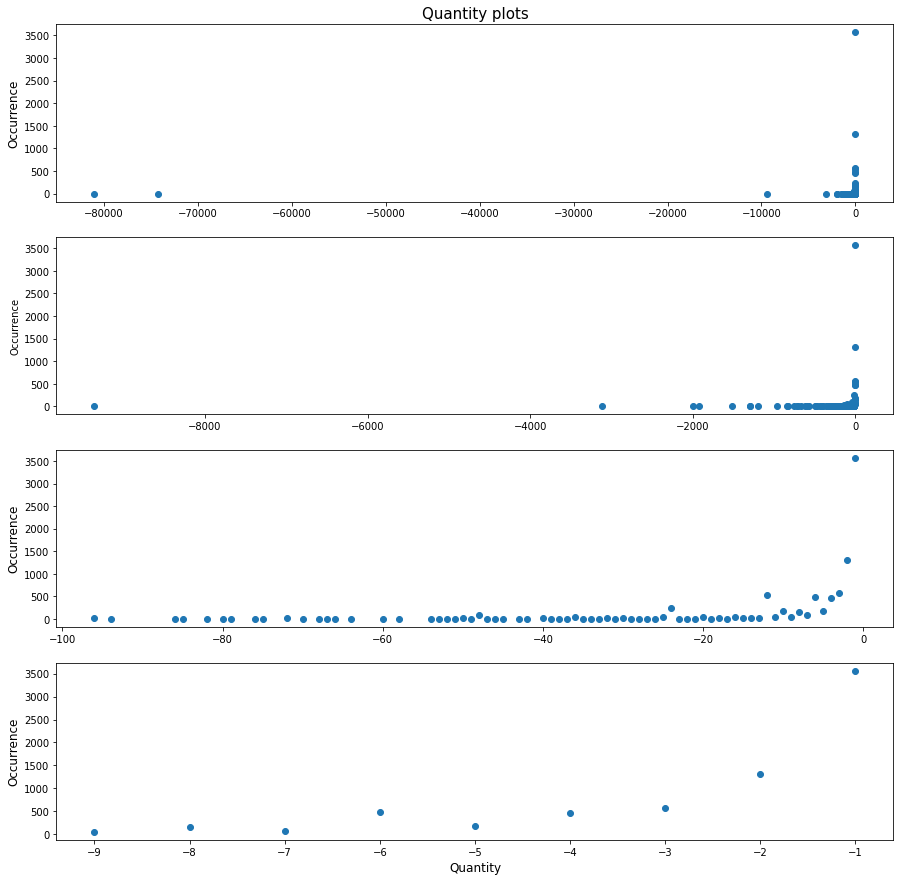

In [13]:
#visualising Quantity
#will someone consider modifying this into boxplot?

plt.figure(figsize=(15,15))

x=df.Quantity.value_counts().reset_index().values.transpose()
plt.subplot(411) #1st digit #rows, 2nd digit #columns, 3rd digit plot number
plt.scatter(x[0], x[1], marker='o')
plt.title('Quantity plots',fontsize=15)
plt.ylabel('Occurrence',fontsize=12)

x=df[df['Quantity'].abs()<20000].Quantity.value_counts().reset_index().values.transpose()
plt.subplot(412)
plt.scatter(x[0], x[1], marker='o')
plt.ylabel('Occurrence')

#Based on 99th percentile
x=df[df['Quantity'].abs()<100].Quantity.value_counts().reset_index().values.transpose()
plt.subplot(413)
plt.scatter(x[0], x[1], marker='o')
plt.ylabel('Occurrence',fontsize=12)

#Based on 3rd quartile
x=df[df['Quantity'].abs()<10].Quantity.value_counts().reset_index().values.transpose()
plt.subplot(414)
plt.scatter(x[0], x[1], marker='o')
plt.xlabel('Quantity',fontsize=12)
plt.ylabel('Occurrence',fontsize=12)

plt.show()

In [14]:
#Identifying what is the equivalent counterpart while taking a look at the outliers.
df[df['Quantity'].abs()>60000]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDateTime,UnitPrice,CustomerID,Country,InvoiceDateTime,mth_end_dt,length_stockcode,length_invoiceno,invoiceno_letter1
985,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346,United Kingdom,2011-01-18 00:00:00,2011-01-31 00:00:00,5,7,C
8662,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446,United Kingdom,2011-12-09 00:00:00,2011-12-31 00:00:00,5,7,C


In [15]:
#Identifying what is the equivalent counterpart while taking a look at the outliers.
df[(df['Quantity'].abs()>5000) & (df['Quantity'].abs()<20000)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDateTime,UnitPrice,CustomerID,Country,InvoiceDateTime,mth_end_dt,length_stockcode,length_invoiceno,invoiceno_letter1
32,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,2010-12-02 14:23:00,0.03,15838,United Kingdom,2010-12-02 00:00:00,2010-12-31 00:00:00,5,7,C


In [16]:
#Check how NaN values affect the dataset
print('Number of rows in each column affected by existence of non-existing values:')
df.isnull().sum()

Number of rows in each column affected by existence of non-existing values:


InvoiceNo              0
StockCode              0
Description            0
Quantity               0
InvoiceDateTime        0
UnitPrice              0
CustomerID           162
Country                0
InvoiceDateTime        0
mth_end_dt             0
length_stockcode       0
length_invoiceno       0
invoiceno_letter1      0
dtype: int64

In [17]:
#Now lets check what is in our negative quantity
df[df["Quantity"]<=0].head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDateTime,UnitPrice,CustomerID,Country,InvoiceDateTime,mth_end_dt,length_stockcode,length_invoiceno,invoiceno_letter1
0,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom,2010-12-01 00:00:00,2010-12-31 00:00:00,6,7,C
1,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom,2010-12-01 00:00:00,2010-12-31 00:00:00,5,7,C
2,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom,2010-12-01 00:00:00,2010-12-31 00:00:00,5,7,C
3,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom,2010-12-01 00:00:00,2010-12-31 00:00:00,5,7,C
4,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom,2010-12-01 00:00:00,2010-12-31 00:00:00,5,7,C
5,C536391,21484,CHICK GREY HOT WATER BOTTLE,-12,2010-12-01 10:24:00,3.45,17548,United Kingdom,2010-12-01 00:00:00,2010-12-31 00:00:00,5,7,C
6,C536391,22557,PLASTERS IN TIN VINTAGE PAISLEY,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom,2010-12-01 00:00:00,2010-12-31 00:00:00,5,7,C
7,C536391,22553,PLASTERS IN TIN SKULLS,-24,2010-12-01 10:24:00,1.65,17548,United Kingdom,2010-12-01 00:00:00,2010-12-31 00:00:00,5,7,C
8,C536506,22960,JAM MAKING SET WITH JARS,-6,2010-12-01 12:38:00,4.25,17897,United Kingdom,2010-12-01 00:00:00,2010-12-31 00:00:00,5,7,C
9,C536543,22632,HAND WARMER RED RETROSPOT,-1,2010-12-01 14:30:00,2.10,17841,United Kingdom,2010-12-01 00:00:00,2010-12-31 00:00:00,5,7,C


In [18]:
#Access all the NaN element in the Description discovered earlier when checking number of rows affected with missing values
#from IPython.display import display, HTML
#dfNADescription=df[df.Description.isnull()]
print('Descriptive statistics of numeric columns:\n',df[df.Description.isnull()].describe())
print('\nDescriptive statistics of CustomerID columns:\n',df[df.Description.isnull()].CustomerID.describe())

Descriptive statistics of numeric columns:
        Quantity  UnitPrice  length_stockcode  length_invoiceno
count       0.0        0.0               0.0               0.0
mean        NaN        NaN               NaN               NaN
std         NaN        NaN               NaN               NaN
min         NaN        NaN               NaN               NaN
25%         NaN        NaN               NaN               NaN
50%         NaN        NaN               NaN               NaN
75%         NaN        NaN               NaN               NaN
max         NaN        NaN               NaN               NaN

Descriptive statistics of CustomerID columns:
 count       0
unique      0
top       NaN
freq      NaN
Name: CustomerID, dtype: object


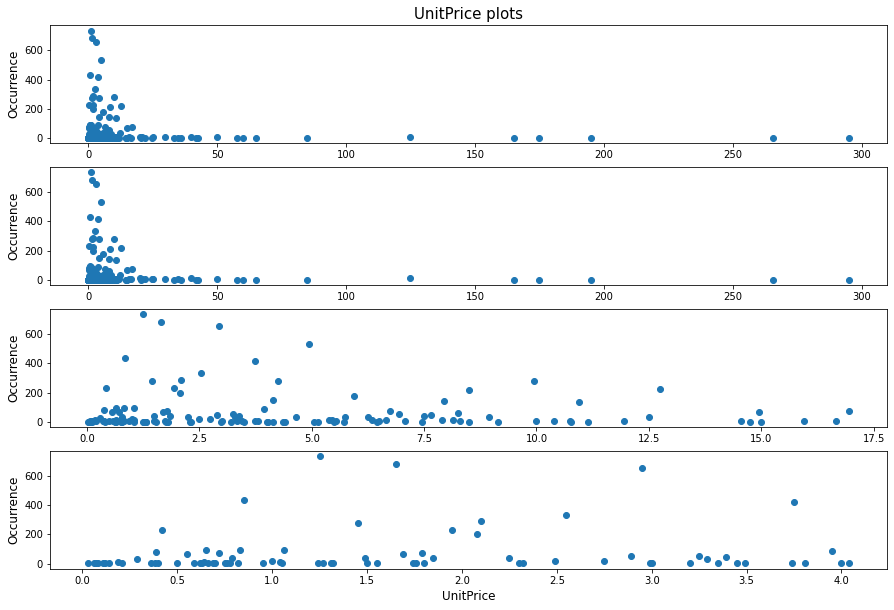

In [21]:
#plot price to see outliers
#since describe reveal that min and max quantities are in the range >10000 as compared to most sections of the dataset

plt.figure(figsize=(15,10))

x=df.UnitPrice.value_counts().reset_index().values.transpose()
plt.subplot(411)
plt.scatter(x[0], x[1], marker='o')
plt.title('UnitPrice plots',fontsize=15)
plt.ylabel('Occurrence',fontsize=12)

x=df[df['UnitPrice'].abs()<20000].UnitPrice.value_counts().reset_index().values.transpose()
plt.subplot(412)
plt.scatter(x[0], x[1], marker='o')
plt.ylabel('Occurrence',fontsize=12)

#99th-percentile
x=df[df['UnitPrice'].abs()<18].UnitPrice.value_counts().reset_index().values.transpose()
plt.subplot(413)
plt.scatter(x[0], x[1], marker='o')
plt.ylabel('Occurrence',fontsize=12)

#3rd quartile
x=df[df['UnitPrice'].abs()<4.13].UnitPrice.value_counts().reset_index().values.transpose()
plt.subplot(414)
plt.scatter(x[0], x[1], marker='o')
plt.ylabel('Occurrence',fontsize=12)
plt.xlabel('UnitPrice',fontsize=12)

plt.show()

In [22]:
#Identifying what is the equivalent counterpart while taking a look at the outliers.
df[df['UnitPrice'].abs()>10000]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDateTime,UnitPrice,CustomerID,Country,InvoiceDateTime,mth_end_dt,length_stockcode,length_invoiceno,invoiceno_letter1


In [23]:
#Identifying what is the equivalent counterpart while taking a look at the outliers.
df[df['UnitPrice'].abs()>10000]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDateTime,UnitPrice,CustomerID,Country,InvoiceDateTime,mth_end_dt,length_stockcode,length_invoiceno,invoiceno_letter1


In [24]:
#Investigating stockcode and invoiceno fields based on discoveries made

#defining the variables
df['length_stockcode']=df.StockCode.str.len()
df['length_invoiceno']=df.InvoiceNo.str.len()
df['invoiceno_letter1']=df['InvoiceNo'].str[0]

print("length of InvoiceNo:\n",df.length_invoiceno.value_counts(sort=True)\
      .reset_index(name='no_rows').rename(columns={'index':'length of InvoiceNo'}))
print("\nFirst letter for invoice:\n",df.invoiceno_letter1.value_counts(sort=True)\
      .reset_index(name='no_rows').rename(columns={'index':'invoice first letter'}))
print("\nCross table first letter for invoice against invoiceno length:\n"\
      ,pd.crosstab(df['invoiceno_letter1'],df['length_invoiceno'],margins=True))
print("\nlength of StockCode:\n",df.length_stockcode.value_counts(sort=True)\
      .reset_index(name='no_rows').rename(columns={'index':'length of StockCode'})) 

length of InvoiceNo:
    length of InvoiceNo  no_rows
0                    7     8668

First letter for invoice:
   invoice first letter  no_rows
0                    C     8668

Cross table first letter for invoice against invoiceno length:
 length_invoiceno      7   All
invoiceno_letter1            
C                  8668  8668
All                8668  8668

length of StockCode:
    length of StockCode  no_rows
0                    5     8017
1                    6      646
2                    7        5


In [25]:
#Discoveries: 
#1.Invoice length is either 6 or 7; those with length 7 will start with letter A or C 
#2.Since most rows have StockCode of length 5 or 6, this is considered the legitimate StockCode referring to item description. 
#4.StockCode length is between 1 to 12 (excl. 10 and 11)
 
 

In [26]:
#display what are the unique stockcodes for invoiceno with length below 5 or above 8
print("\nDescription for StockCode with length below 5 or above 8 and number of lines affected:")
      #\n"\
#      ,df[(df['length_stockcode']<5) | (df['length_stockcode']>8)]\
#      [['length_stockcode','invoiceno_letter1','StockCode','Description']]\
#      .groupby(by=['invoiceno_letter1','length_stockcode','StockCode']).Description.value_counts().reset_index(name='Freq'))

df[(df['length_stockcode']<5) | (df['length_stockcode']>8)]\
[['length_stockcode','invoiceno_letter1','StockCode','Description']]\
.groupby(by=['length_stockcode','StockCode','invoiceno_letter1']).Description.value_counts().reset_index(name='Freq')


Description for StockCode with length below 5 or above 8 and number of lines affected:


,length_stockcode,StockCode,invoiceno_letter1,Description,Freq


In [27]:
#analysing stockcode and invoiceno field

#display what are the unique stockcodes for invoiceno of length 7 or 8
print("\nDescription for StockCode with length 7 or 8 and number of lines affected:\n")
df[(df['length_stockcode']==7) | (df['length_stockcode']==8)]\
[['length_stockcode','invoiceno_letter1','StockCode','Description']]\
.groupby(by=['length_stockcode','StockCode']).Description.value_counts().reset_index(name='freq')


Description for StockCode with length 7 or 8 and number of lines affected:



,length_stockcode,StockCode,Description,freq
0,7,15056BL,EDWARDIAN PARASOL BLACK,5


In [28]:
#From initial assessment, we found out most problematic description contain lower case letter and '?' symbol
df[df['Description'].str.contains("^[a-z]|\\?",case=True, na=False)].\
drop(['mth_end_dt','length_stockcode','length_invoiceno','invoiceno_letter1'],axis=1).head(20)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDateTime,UnitPrice,CustomerID,Country,InvoiceDateTime


In [29]:
print('no of rows affected:',df[(df.CustomerID.isnull()) & (df['UnitPrice']==0)].shape[0])
df[(df.CustomerID.isnull()) & (df['UnitPrice']==0)]\
.Description.value_counts().reset_index(name='freq').rename(columns={'index':'Description'}).head(20)

no of rows affected: 0


,Description,freq
